
 1) CARGA Y EXPLORACIÓN ===

Dataset cargado desde: /content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv

Filas y columnas: (1000, 8)

Tipos de datos por columna:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

 2) VALORES FALTANTES ===

Valores faltantes por columna:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 3) TRANSFORMACIÓN 'gender' -> 'gender encoded' ===
Valores únicos originales en gender: ['female', 'male']
Conteo gender encoded:
 gender encoded
0    518
1    482
Name

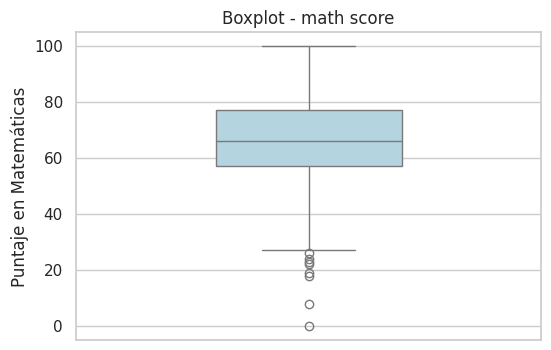

Boxplot guardado en: /content/drive/MyDrive/Colab Notebooks/boxplot_math.png

 6) INTEGRACIÓN SIMULADA ===
Socio con duplicado: (1001, 3)
Merged shape: (1000, 14)
Counts _merge:
 _merge
both          1000
left_only        0
right_only       0
Name: count, dtype: int64
Nulos en socio columnas tras merge:
 household income    0
internet access     0
dtype: int64

 7) PCA (2 componentes) ===
Numeric cols considered: ['math score', 'reading score', 'writing score', 'gender encoded']
Explained variance ratio: [0.68723788 0.2780958 ]
Explained cumulative: [0.68723788 0.96533368]
PCA components saved to: /content/drive/MyDrive/Colab Notebooks/pca_components.csv

Archivo preprocesado guardado en: /content/drive/MyDrive/Colab Notebooks/StudentsPerformance_preprocessed.csv


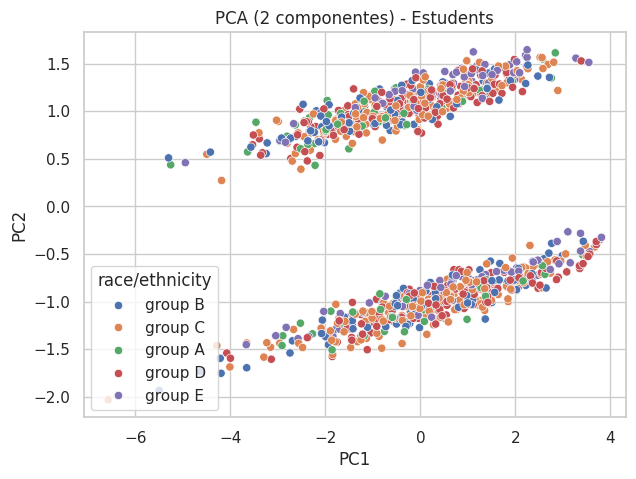

In [4]:
# ===========================
# EVA1 - Noemi Mamani Ayala
# ===========================

#--------------------------------------
# 1. Carga y exploración de los datos:
#Carga el dataset utilizando Pandas. ¿Cuántas filas y columnas tiene el dataset?
#¿Cuáles son los tipos de datos de cada columna?
#--------------------------------------

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

#Validar que el archivo esta disponible /content/sample_data/StudentsPerformance.csv
# Ruta (Colab: /content)
paths_to_try = [r'/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv']

df = None
for p in paths_to_try:
    if os.path.exists(p):
        df = pd.read_csv(p)
        data_path = p
        break

if df is None:
    raise FileNotFoundError("No se encontró 'StudentsPerformance.csv' en /content/drive/MyDrive/Colab Notebook")


# ---------------------------
# 1. Carga y exploración de los datos: Carga el dataset utilizando Pandas.
# * ¿Cuántas filas y columnas tiene el dataset?
# * ¿Cuáles son los tipos de datos de cada columna?
# ---------------------------
print("\n 1) CARGA Y EXPLORACIÓN ===")
print("\nDataset cargado desde:", data_path)
print("\nFilas y columnas:", df.shape)

# tipos de datos de cada columna
print("\nTipos de datos por columna:\n", df.dtypes)

# ---------------------------
# 2) Detección de valores faltantes:
# * ¿Hay valores faltantes en alguna columna? Si los hay,
# * describe qué método usarías para tratarlos y justifica tu decisión.
# ---------------------------
print("\n 2) VALORES FALTANTES ===")
missing_counts = df.isnull().sum()
print("\nValores faltantes por columna:\n", missing_counts)
# Recomendación: si existen columnas numéricas con pocos nulos -> imputar mediana

# ---------------------------
# 3) Transformación de gender a numérico
# ---------------------------
print("\n 3) TRANSFORMACIÓN 'gender' -> 'gender encoded' ===")
if 'gender' in df.columns:
    # limpiar y mapear varias variantes
    df['gender clean'] = df['gender'].astype(str).str.strip().str.lower()
    mapa = {'male':1,'female':0}
    df['gender encoded'] = df['gender clean'].map(mapa).astype('Int64')
    print("Valores únicos originales en gender:", sorted(df['gender'].dropna().astype(str).unique()))
    print("Conteo gender encoded:\n", df['gender encoded'].value_counts(dropna=False))
else:
    print("No se encontró columna 'gender'. Crea la columna o revisa el CSV.")

# ---------------------------
# 4) Normalización Min–Max (puntajes)
# ---------------------------
print("\n 4) NORMALIZACIÓN Min–Max ===")

# Normalización Min-Max sobre columnas numéricas seleccionadas
score_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Incluir solo columnas solicitadas:
present = [c for c in score_cols if c in ['math score','reading score','writing score']]

if present:

    imputer = SimpleImputer(strategy='median') # imputar mediana si existen nulos
    df[present] = imputer.fit_transform(df[present])
    scaler = MinMaxScaler() #Crea un objeto del tipo MinMaxScaler del módulo sklearn.preprocessing
    df_scaled = df.copy() #Crea un objeto del tipo MinMaxScaler del módulo sklearn.preprocessing
    df_scaled[present] = scaler.fit_transform(df[present]) #Aplica el escalador Min-Max solo sobre las columnas numéricas indicadas en numeric_for_scaling

    # Mostrar rango después de Min-Max
    # .agg Aplica una agregación múltiple: calcula el mínimo (min) y el máximo (max)
    # para cada columna seleccionada, lo entrega en filas, por ello la .T para transponer y cambiar filas por columnas
    print("Rangos tras Min-Max:\n", df_scaled[present].agg(['min','max']).T)

else:
    print("No hay columnas de puntaje para normalizar.")

# ---------------------------
# 5) Outliers en math_score
# ---------------------------
print("\n=== 5) DETECCIÓN DE OUTLIERS (math_score) ===")

if 'math score' in df.columns:
    # c = 'math score'
    # q1 = df[c].quantile(0.25); q3 = df[c].quantile(0.75)
    # iqr = q3 - q1; lower = q1 - 1.5 * iqr; upper = q3 + 1.5 * iqr
    # out = df[(df[c] < lower) | (df[c] > upper)][c]
    # print(f"Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}, lower={lower:.2f}, upper={upper:.2f}")
    # print("Número de outliers:", out.shape[0])
    # # plot y guardar
    # plt.figure(figsize=(6,4))
    # sns.boxplot(y=df[c])
    # plt.title(f"Boxplot - {c}")
    # outpath = os.path.join(os.path.dirname(data_path), 'boxplot_math.png')
    # plt.savefig(outpath)
    # plt.close()
    # print("Boxplot guardado en:", outpath)

    c = 'math score'
    # Calcular cuartiles y rango intercuartílico
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1

    # Límites inferior y superior
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Filtrar outliers
    outliers_math = df[(df[c] < lower) | (df[c] > upper)][c]

    # Mostrar resultados
    print(f"\n=== Análisis de outliers en '{c}' ===")
    print(f"Q1 = {q1:.2f}")
    print(f"Q3 = {q3:.2f}")
    print(f"IQR = {iqr:.2f}")
    print(f"Límite inferior = {lower:.2f}")
    print(f"Límite superior = {upper:.2f}")
    print(f"Número de outliers detectados: {outliers_math.shape[0]}")

    # --- Visualización con boxplot ---
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[c], color="lightblue", width=0.4)
    plt.title(f"Boxplot - {c}")
    plt.ylabel("Puntaje en Matemáticas")

    # Guardar el gráfico en la carpeta del dataset
    outpath = os.path.join(os.path.dirname(data_path), 'boxplot_math.png')
    plt.savefig(outpath)
    plt.show()

    print(f"Boxplot guardado en: {outpath}")

else:
    print("math_score no encontrada; no es posible detectar outliers específicos.")


# ---------------------------
# 6) Integración de datasets (simulada)
# ---------------------------
print("\n 6) INTEGRACIÓN SIMULADA ===")
# crear student id si no existe
if 'student id' not in df.columns:
    df.insert(0, 'student id', range(1, len(df)+1))

# simular dataset socioeconomico
np.random.seed(42)
socio = pd.DataFrame({
    'student id': df['student id'].sample(frac=1.0, replace=False).values,
    'household income': np.random.randint(300,3000,size=len(df)),
    'internet access': np.random.choice(['yes','no'], size=len(df), p=[0.75,0.25])
})

# introducir duplicado intencional y limpiar
socio = pd.concat([socio, socio.iloc[[0]]], ignore_index=True)
print("Socio con duplicado:", socio.shape)
socio_clean = socio.drop_duplicates(subset='student id', keep='first')
merged = df.merge(socio_clean, on='student id', how='left', indicator=True)
print("Merged shape:", merged.shape)
print("Counts _merge:\n", merged['_merge'].value_counts())
print("Nulos en socio columnas tras merge:\n", merged[['household income','internet access']].isnull().sum())



# ---------------------------
# 7) PCA sobre numéricas
# ---------------------------
print("\n 7) PCA (2 componentes) ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['student id']]
print("Numeric cols considered:", numeric_cols)

if numeric_cols:

    X_num = SimpleImputer(strategy='median').fit_transform(df[numeric_cols])
    X_scaled = StandardScaler().fit_transform(X_num)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Explained cumulative:", np.cumsum(pca.explained_variance_ratio_))
    # guardar componentes
    pca_path = os.path.join(os.path.dirname(data_path), 'pca_components.csv')
    np.savetxt(pca_path, X_pca, delimiter=',')
    print("PCA components saved to:", pca_path)

else:
    print("No hay columnas numéricas para PCA.")

# ---------------------------
# Guardar preprocesado
# ---------------------------
out_preproc = os.path.join(os.path.dirname(data_path), 'StudentsPerformance_preprocessed.csv')
df.to_csv(out_preproc, index=False)
print("\nArchivo preprocesado guardado en:", out_preproc)

# Graficar componentes principales (coloreado por race/ethnicity para ver separación)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['race/ethnicity'].astype(str), palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 componentes) - Estudents')
plt.legend(title='race/ethnicity')
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
